In [1]:
from utils import create_df, plot_submovement_count, plot_refinement_time, calculate_endpoint_variance, plot_endpoint_variance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
cmap = plt.get_cmap('plasma') 
all_variants = ["Distance + Bonus + Effort Model", "Bonus", "Distance + Bonus", "Distance"]
values = np.linspace(0, len(all_variants), len(all_variants)) 
colors = {key: cmap(v / 5) for key, v in zip(all_variants, values)}

In [3]:
effort_models = ["zero_effort", "dc_effort_w1", "jac_effort_w1", "ctc_effort_w1", "armmovementpaper_effort"]
data_df_1, number_of_episodes = create_df(["no_bonus"], ["zero_effort"], ["dist"], "../../simulators/", run_nr=1, task="pointing")
data_df_2, number_of_episodes = create_df(["hit_bonus"], effort_models, ["dist"], "../../simulators/", run_nr=1, task="pointing")
sparse_data_df, _ = create_df(["hit_bonus_8"], ["zero_effort"], ["no"], "../../simulators/", run_nr=1, task="pointing")
all_combined_df = pd.concat([sparse_data_df, data_df_1, data_df_2])

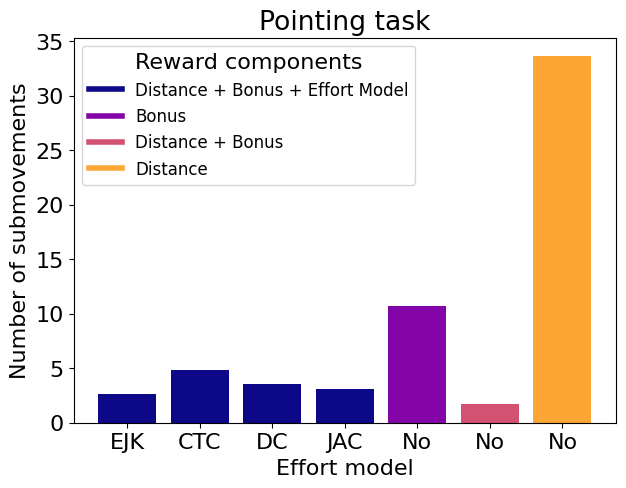

In [4]:
plot_submovement_count("Pointing task", "pointing", all_combined_df, colors)

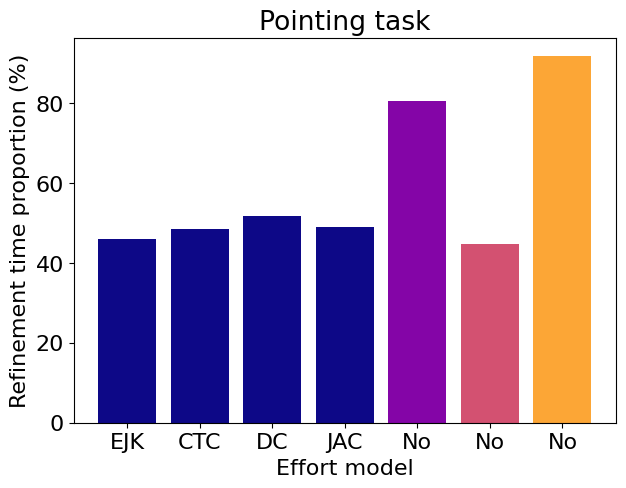

In [5]:
plot_refinement_time("Pointing task", "pointing", all_combined_df, colors)

In [6]:
endpoint_variance_df1 = calculate_endpoint_variance(["no_bonus"], ["zero_effort"], ["dist"], "../../simulators/", task="pointing")
endpoint_variance_df2 = calculate_endpoint_variance(["hit_bonus"], effort_models, ["dist"], "../../simulators/", task="pointing")
endpoint_variance_df3 = calculate_endpoint_variance(["hit_bonus_8"], ["zero_effort"], ["no"], "../../simulators/", task="pointing")
endpoint_variance_combined_df = pd.concat([endpoint_variance_df1, endpoint_variance_df2, endpoint_variance_df3])

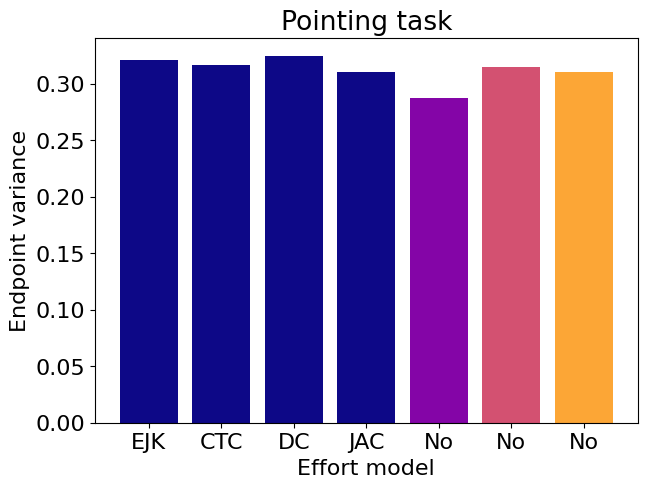

In [7]:
plot_endpoint_variance("Pointing task", "pointing", endpoint_variance_combined_df, colors)